540:540 COMP MTHDS HW 1 

#### Monte Carlo Integration Approach

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import *

In [12]:
plt.style.use('seaborn')

E(h(x)) is 0.9374537504912409 with the MC integration when N=1000


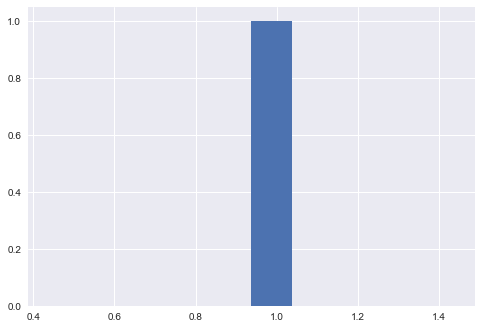

In [13]:
N = 1000
x  = 10 * np.random.random(size=N)  # U(0, 10) 
ans1_1 = 1/N * sum(10 * laplace.pdf(x,5,0.5))
count, bins, ignored = plt.hist(ans1_1, 10)
print("E(h(x)) is",ans1_1,"with the MC integration when N=1000")

## Importance Sampling Approach

E(h(x)) is  0.9918975209046498 with the Importance Sampling Integration in N=1000


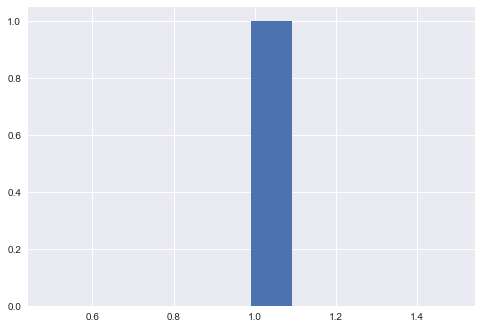

In [14]:
N = 1000
y = np.random.normal(5, 1, N)  #N(5,1)
ans1_2 = 1 / N * sum(
    laplace.pdf(y, 5, 0.5) /
    ((1 / np.sqrt(2 * np.pi)) * np.exp(-(y - 5)**2 / 2)))
count, bins, ignored = plt.hist(ans1_2, 10)
print("E(h(x)) is ", ans1_2,
      "with the Importance Sampling Integration in N=1000")

## Compare Monte Carlo Integration & Importance Sampling for different sample sizes

In [5]:
Ns = np.linspace(100, 200000, 20)
ans1s = []
ans2s = []

for i in range(len(Ns)):
    N = int(Ns[i])

    x = 10 * np.random.random(size=N)
    ans1 = 1 / N * sum(10 * laplace.pdf(x, 5, 0.5))
    ans1s.append(ans1)

    y = np.random.normal(5, 1, N)
    ans2 = 1 / N * sum(
        laplace.pdf(y, 5, 0.5) /
        ((1 / np.sqrt(2 * np.pi)) * np.exp(-(y - 5)**2 / 2)))
    ans2s.append(ans2)
print(f"When N = {Ns},\n E(h(x)) = {ans1s} with MC intgration method\n E(h(x)) = {ans2s} with IS Method.")

When N = [1.00000000e+02 1.06210526e+04 2.11421053e+04 3.16631579e+04
 4.21842105e+04 5.27052632e+04 6.32263158e+04 7.37473684e+04
 8.42684211e+04 9.47894737e+04 1.05310526e+05 1.15831579e+05
 1.26352632e+05 1.36873684e+05 1.47394737e+05 1.57915789e+05
 1.68436842e+05 1.78957895e+05 1.89478947e+05 2.00000000e+05],
 E(h(x)) = [1.0177874366864277, 1.0268418825635468, 0.9900663397470951, 0.9950611961301207, 0.9897284235336441, 0.9951978952678496, 1.0037752442113206, 0.9985889842624791, 0.997011986236027, 0.998652273489712, 1.0039770085373743, 0.9991754190102813, 1.0031716590734507, 0.9931061373334605, 0.9948506689813053, 1.0035354566962127, 0.9955730246352446, 0.9985040102535482, 0.9997271621465875, 0.9978221263892958] with MC intgration method
 E(h(x)) = [1.0556885872004054, 0.9894653780021011, 0.9958399990411532, 1.0012454515231655, 1.0011375468988242, 1.0009267870769396, 1.000307718144869, 1.000159254048389, 1.0016807321122085, 0.9998889426352998, 1.0008108988009932, 1.0018868898327997

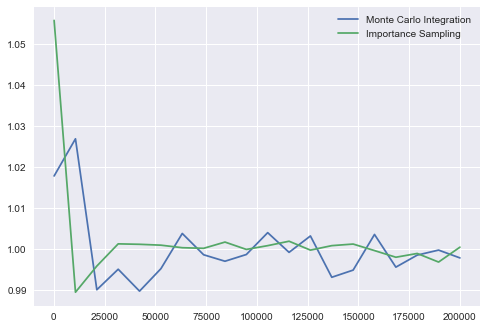

In [6]:
_, ax = plt.subplots()
ax.plot(Ns, ans1s, label='Monte Carlo Integration')
ax.plot(Ns, ans2s, label='Importance Sampling')
ax.legend()

## Importance Sampling evaluate  m-th  moment when m = 2,3,4,5

In [7]:
N = 1000
z = np.random.normal(0, 2, N)  #N(0,2)

Ms = [2, 3, 4, 5]
ms = []

for i in range(len(Ms)):
    M = int(Ms[i])
    m = 1 / N * (sum(z**M * laplace.pdf(z, 0, 1) / (norm.pdf(z, 0, 4))))
    ms.append(m)
    
    print(f'M = {M}, {M}-th moment = {m}')

M = 2, 2-th moment = 1.9569379829083673
M = 3, 3-th moment = 0.2494794557739235
M = 4, 4-th moment = 10.275818160948436
M = 5, 5-th moment = 1.571656152039948


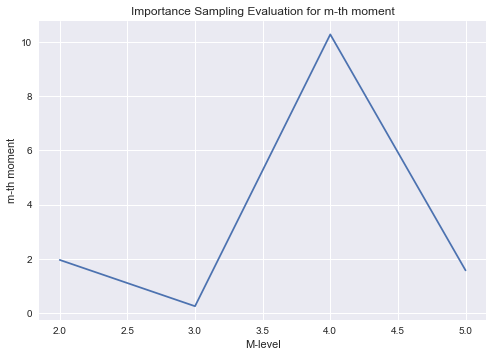

In [8]:
_, ax = plt.subplots()
ax.set_xlabel('M-level')
ax.set_ylabel('m-th moment')
ax.set_title('Importance Sampling Evaluation for m-th moment')
ax.plot(Ms, ms)

## Report the sample mean and variance of h(X) when the sample size = 100,1000,10000 each.

In [9]:
Ns = [100,1000,10000]

means = []
variances = []

for i in range(len(Ns)):
    N = int(Ns[i])
    z = np.random.normal(0,2, N)
    m2 = 1/N *(sum(z**2*laplace.pdf(z, 0, 1)/(norm.pdf(z, 0, 4))))
    mean = 1/N *(sum(z*laplace.pdf(z, 0, 1)/(norm.pdf(z, 0, 4))))
    means.append(mean)
    
    variance = m2- mean**2
    variances.append(variance)
print(f'When N={Ns},\n h(x)\'s mean = {means}, variance is {variances}')

When N=[100, 1000, 10000],
 h(x)'s mean = [0.02943904476554326, -0.031202615794899174, 0.013718504735976349], variance is [2.1041515898326755, 1.9932465024449286, 1.981540309792499]


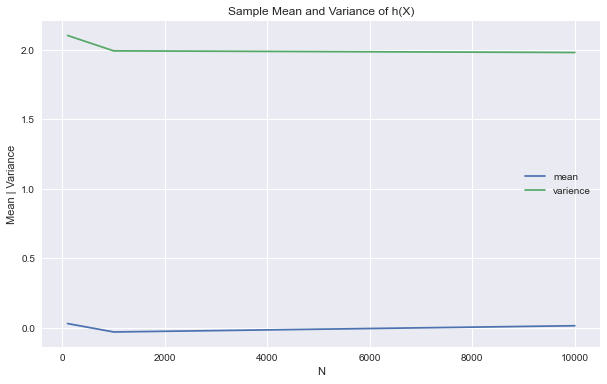

In [10]:
_, ax = plt.subplots(figsize=(10,6))
ax.set_xlabel('N')
ax.set_ylabel('Mean | Variance')
ax.set_title('Sample Mean and Variance of h(X)')
ax.plot(Ns, means, label='mean')
ax.plot(Ns, variances, label='varience')
ax.legend()